In [1]:
pip install tensorflow==2.15.0 tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 760.7 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 70.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 18.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: kera

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa
from tensorflow.keras import layers
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-11-04 20:32:53.006755: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-04 20:32:53.006826: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-04 20:32:53.009161: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our Tens

/kaggle/input/gan-getting-started/monet_jpg/f4413e97bd.jpg
/kaggle/input/gan-getting-started/monet_jpg/7341d96c1d.jpg
/kaggle/input/gan-getting-started/monet_jpg/de6f71b00f.jpg
/kaggle/input/gan-getting-started/monet_jpg/99d94af5dd.jpg
/kaggle/input/gan-getting-started/monet_jpg/99a51d3e25.jpg
/kaggle/input/gan-getting-started/monet_jpg/d05cab011d.jpg
/kaggle/input/gan-getting-started/monet_jpg/4e05523825.jpg
/kaggle/input/gan-getting-started/monet_jpg/c68c52e8fc.jpg
/kaggle/input/gan-getting-started/monet_jpg/40d7d18ad3.jpg
/kaggle/input/gan-getting-started/monet_jpg/f96a8de9f3.jpg
/kaggle/input/gan-getting-started/monet_jpg/79224da51f.jpg
/kaggle/input/gan-getting-started/monet_jpg/23832dead5.jpg
/kaggle/input/gan-getting-started/monet_jpg/85580214be.jpg
/kaggle/input/gan-getting-started/monet_jpg/47a0548067.jpg
/kaggle/input/gan-getting-started/monet_jpg/fb93438ff9.jpg
/kaggle/input/gan-getting-started/monet_jpg/89d970411d.jpg
/kaggle/input/gan-getting-started/monet_jpg/7960adbd50.j

In [3]:
Monet_file = tf.io.gfile.glob("/kaggle/input/gan-getting-started/monet_tfrec/*.tfrec")
Photo_file = tf.io.gfile.glob("/kaggle/input/gan-getting-started/photo_tfrec/*.tfrec")
print('Number of Monet TFRecord files found:', len(Monet_file))
print('Number of Photo TFRecord files found:', len(Photo_file))

Number of Monet TFRecord files found: 5
Number of Photo TFRecord files found: 20


In [4]:
""""" 
# if we were working with JPG instead of TFREC no need to decode them images 

def load_jpeg_image(image_path):
    image = tf.io.read_file(image_path)  # Reads the file (in binary)
    image = tf.image.decode_jpeg(image, channels=3)  # Decodes JPEG into tensor
    image = (tf.cast(image, tf.float32) / 127.5) - 1  # Normalize to [-1, 1]

    return image

def load_jpeg_dataset(filenames):
    dataset = tf.data.Dataset.from_tensor_slices(filenames)
    dataset = dataset.map(load_jpeg_image, num_parallel_calls=AUTOTUNE)
   
    return dataset

jpeg_filenames = tf.io.gfile.glob("/kaggle/input/gan-getting-started/monet_jpg/*.jpg")
jpeg_ds = load_jpeg_dataset(jpeg_filenames).batch(1)

"""""


'"" \n# if we were working with JPG instead of TFREC no need to decode them images \n\ndef load_jpeg_image(image_path):\n    image = tf.io.read_file(image_path)  # Reads the file (in binary)\n    image = tf.image.decode_jpeg(image, channels=3)  # Decodes JPEG into tensor\n    image = (tf.cast(image, tf.float32) / 127.5) - 1  # Normalize to [-1, 1]\n\n    return image\n\ndef load_jpeg_dataset(filenames):\n    dataset = tf.data.Dataset.from_tensor_slices(filenames)\n    dataset = dataset.map(load_jpeg_image, num_parallel_calls=AUTOTUNE)\n   \n    return dataset\n\njpeg_filenames = tf.io.gfile.glob("/kaggle/input/gan-getting-started/monet_jpg/*.jpg")\njpeg_ds = load_jpeg_dataset(jpeg_filenames).batch(1)\n\n'

In [5]:
# Decoding the TFrec files 
IMAGE_SIZE = [256, 256]

def decode_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    # Normalization
    # By dividing by 127.5, the pixel values (which originally range from 0 to 255) are scaled to range between 0 and 2 (instead of 0 and 1).
    # By subtractig by 1 This shifts the normalized pixel range to [-1, 1] instead of the more common [0, 1] range 
    image = (tf.cast(image, tf.float32) / 127.5) - 1
    image = tf.reshape(image, [*IMAGE_SIZE, 3])
    return image

def read_tfrecord(example):
    tfrecord_format = {
        "image_name": tf.io.FixedLenFeature([], tf.string),
        "image": tf.io.FixedLenFeature([], tf.string),
        "target": tf.io.FixedLenFeature([], tf.string)
    }
    example = tf.io.parse_single_example(example, tfrecord_format)
    image = decode_image(example['image'])
    return image, 

In [6]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

def load_dataset(filenames, labeled=True, ordered=False):
    dataset = tf.data.TFRecordDataset(filenames)
    dataset = dataset.map(read_tfrecord, num_parallel_calls=AUTOTUNE)
    return dataset

In [7]:
Monet_ds = load_dataset(Monet_file, labeled=True).batch(1)
Photo_ds = load_dataset(Photo_file, labeled=True).batch(1)

In [8]:
M_data_it = Monet_ds.as_numpy_iterator()
P_data_it = Photo_ds.as_numpy_iterator()

In [9]:
M_data_it.next()

(array([[[[ 0.082353  , -0.01960784, -0.16862744],
          [-0.03529412, -0.1372549 , -0.2862745 ],
          [-0.12156862, -0.20784312, -0.3490196 ],
          ...,
          [-0.09019607, -0.20784312, -0.46666664],
          [-0.12156862, -0.23137254, -0.52156866],
          [-0.15294117, -0.26274508, -0.5529412 ]],
 
         [[ 0.11372554,  0.01176476, -0.1372549 ],
          [ 0.05882359, -0.04313725, -0.19215685],
          [ 0.0196079 , -0.06666666, -0.20784312],
          ...,
          [ 0.06666672, -0.05098039, -0.3098039 ],
          [ 0.0196079 , -0.09019607, -0.38039213],
          [-0.02745098, -0.1372549 , -0.42745095]],
 
         [[ 0.10588241,  0.00392163, -0.14509803],
          [ 0.10588241,  0.00392163, -0.14509803],
          [ 0.12156868,  0.03529418, -0.10588235],
          ...,
          [ 0.17647064,  0.05882359, -0.19999999],
          [ 0.11372554,  0.00392163, -0.27058822],
          [ 0.05882359, -0.05098039, -0.34117645]],
 
         ...,
 
         [[-

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..

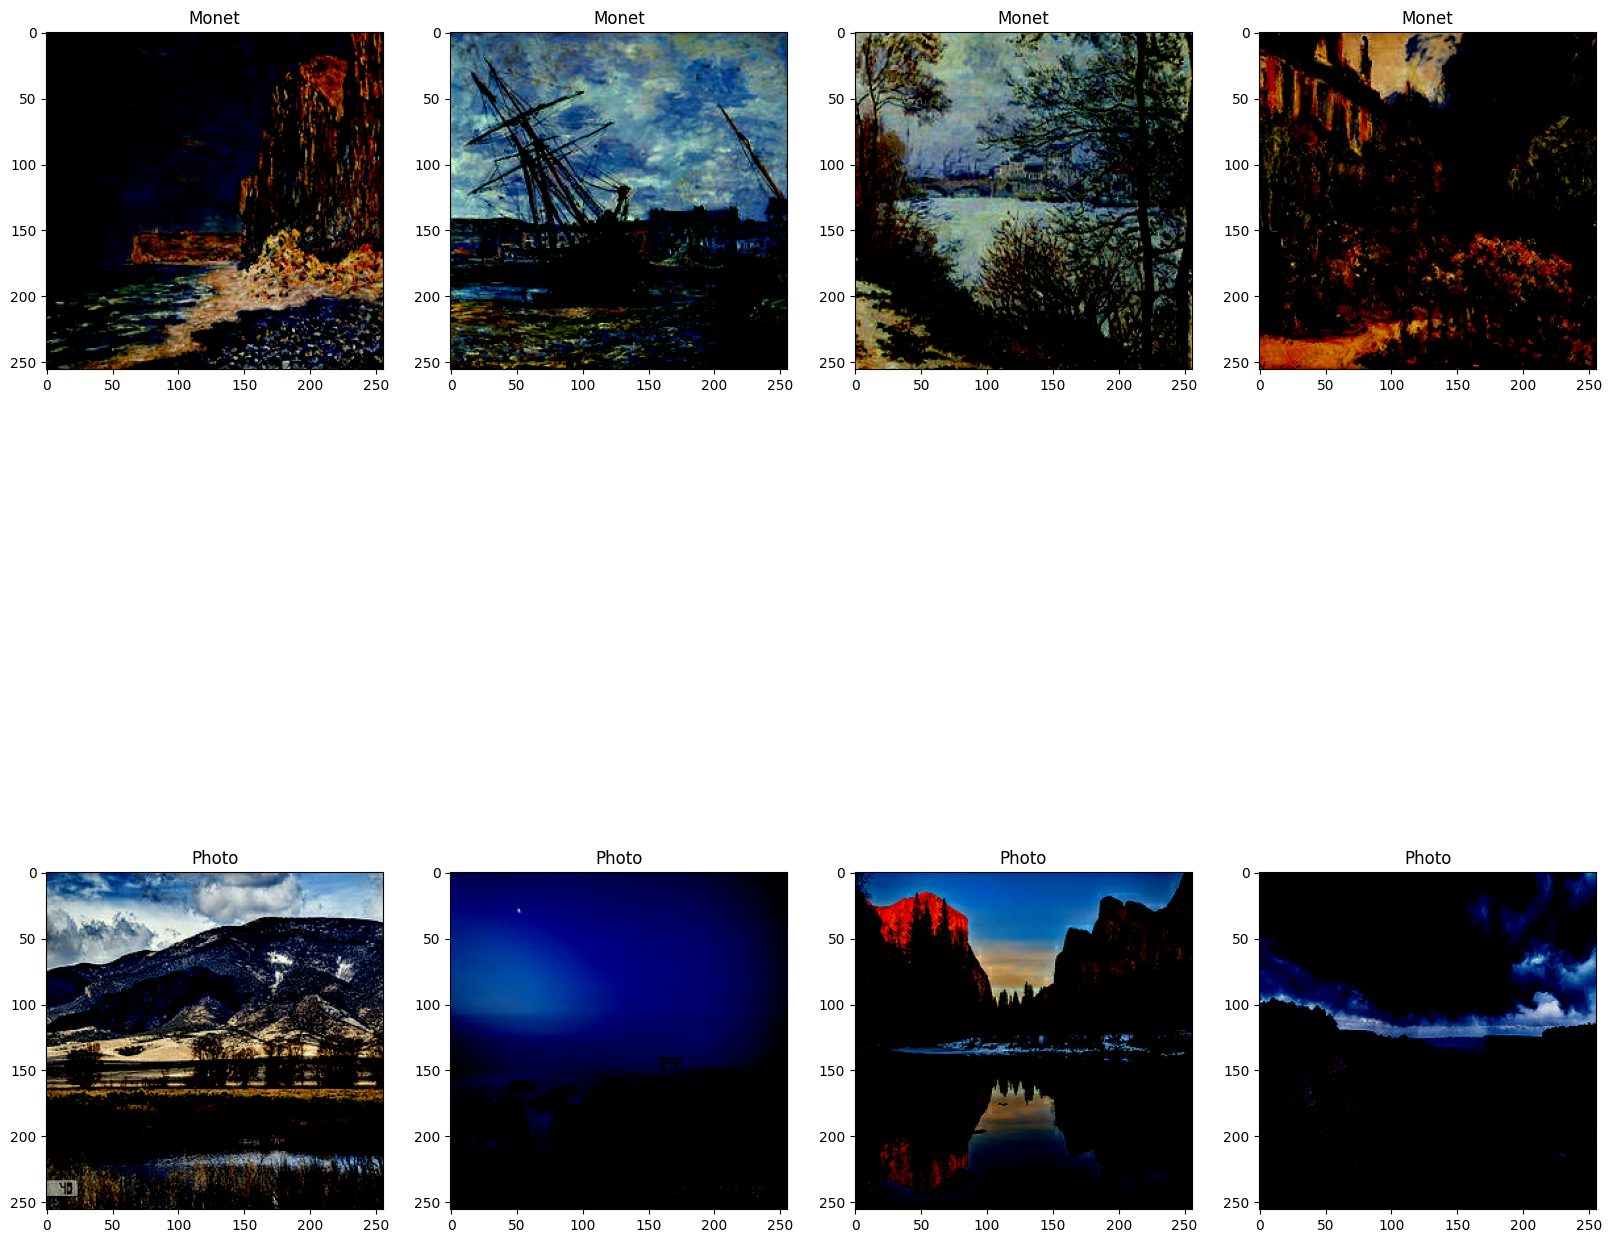

In [10]:
# Setup the subplot formatting 
fig, ax = plt.subplots(nrows = 2, ncols=4, figsize=(20,20))
# Loop four times and get images 
for idx in range(4): 
    # Grab an image and label
    M_sample = M_data_it.next()
    # Plot the image using a specific subplot 
    ax[0,idx].imshow(np.squeeze(M_sample))
    # Appending the image label as the plot title 
    ax[0,idx].title.set_text("Monet")
    
    P_sample = P_data_it.next()
    # Plot the image using a specific subplot 
    ax[1,idx].imshow(np.squeeze(P_sample))
    # Appending the image label as the plot title 
    ax[1,idx].title.set_text("Photo")

In [11]:
example_monet = next(iter(Monet_ds))
example_photo = next(iter(Photo_ds))

In [12]:
# Function to count the samples in the dataset
def count_samples(dataset):
    count = 0
    for _ in dataset:
        count += 1
    return count


# Count Monet samples
num_monet_samples = count_samples(Monet_ds)
print(f'Number of Monet samples: {num_monet_samples}')

# Count Photo samples
num_photo_samples = count_samples(Photo_ds)
print(f'Number of Photo samples: {num_photo_samples}')


Number of Monet samples: 300
Number of Photo samples: 7038


In [13]:


# Optimized pipeline
Monet_ds = Monet_ds.cache()
Monet_ds = Monet_ds.shuffle(300)       # Shuffle the dataset
#Monet_ds = Monet_ds.batch(128)         # Batch size 128 for more efficient training
Monet_ds = Monet_ds.prefetch(AUTOTUNE) # Prefetch to reduce bottlenecks

Photo_ds = Photo_ds.cache()
Photo_ds = Photo_ds.shuffle(300)
#Photo_ds = Photo_ds.batch(128)
Photo_ds = Photo_ds.prefetch(AUTOTUNE)


In [14]:
      
for data in Monet_ds.take(1):
    image = data[0]  # Access the image if it's the first element of the tuple
    print(image.shape)  # Print the shape of the image

(1, 256, 256, 3)


##  Generator Model

### Downsample:

In [15]:
OUTPUT_CHANNELS = 3
def d_sample (filters, size, instance_norm=True):
    
    initializer  = tf.random_normal_initializer(0., 0.02)
    gamma_innit  = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
    
    model = Sequential()
    
    model.add(Conv2D(filters, size, strides=2, padding='same',
                    kernel_initializer= initializer, use_bias=False))
    
    if instance_norm:
        model.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_innit))
        
    model.add(layers.LeakyReLU())
    
    return model

### Upsample:

In [16]:
def up_sample(filters, size, dropout_layer=False):
    
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

    model = Sequential()
    
    model.add(layers.Conv2DTranspose(filters, size, strides=2, padding='same',
                              kernel_initializer=initializer, use_bias=False))

    model.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))

    if dropout_layer:
        model.add(Dropout(0.5))

    model.add(layers.ReLU())

    return model

### Gernerator

In [17]:

def Generator():
    
    inputs = layers.Input(shape=[256,256,3])
    
    d_sample_stack = [
        d_sample(64, 4, instance_norm=False), # (128, 128, 64, 128) since were using a stride of 2 were divinng the size of the image by 2
        d_sample(128, 4), # (bs, 64, 64, 128)
        d_sample(256, 4), # (bs, 32, 32, 256)
        d_sample(512, 4), # (bs, 16, 16, 512)
        d_sample(512, 4), # (bs, 8, 8, 512)
        d_sample(512, 4), # (bs, 4, 4, 512)
        d_sample(512, 4), # (bs, 2, 2, 512)
        d_sample(512, 4), # (bs, 1, 1, 512)
    ]
    
    up_sample_stack = [
        up_sample(512, 4, dropout_layer=True), # (bs, 2, 2, 1024) opposite here for upsmapling
        up_sample(512, 4, dropout_layer=True), # (bs, 4, 4, 1024)
        up_sample(512, 4, dropout_layer=True), # (bs, 8, 8, 1024)
        up_sample(512, 4), # (bs, 16, 16, 1024)
        up_sample(256, 4), # (bs, 32, 32, 512)
        up_sample(128, 4), # (bs, 64, 64, 256)
        up_sample(64, 4), # (bs, 128, 128, 128)
    ]
    
    
    initializer = tf.random_normal_initializer(0., 0.02)
    last = layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                  strides=2,
                                  padding='same',
                                  kernel_initializer=initializer,
                                  activation='tanh') # (bs, 256, 256, 3)
    
    
    x = inputs
    
        # Downsampling through the model
        
    skips = []
    for down in d_sample_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])
#This loop ^^ iterates over the down_stack, which is a sequence of downsampling layers, and applies each layer to x
#We use "reversed(skips[:-1])" so we have the input for upsampling in opposite order 
#Which helps retain finer details and makes the reconstructed images more coherent, which is crucial for CycleGANs and similar generative models.
    # Upsampling and establishing the skip connections
    for up, skip in zip(up_sample_stack, skips):
        x = up(x)
        x = layers.Concatenate()([x, skip])

    x = last(x)

    return keras.Model(inputs=inputs, outputs=x)
# This block ^^ enables the model to create a high-resolution output image 
# By progressively adding detail from both the upsampling and skip connections from the downsampling.








## Disriminator Model
**In the discriminator model we use PatchGAN. The PatchGAN discriminator works on small patches instead of the entire image, which allows it to capture texture-level details across the image. Instead of outputing a single node, the discriminator outputs a smaller 2D image with higher pixel values indicating a real classification and lower values indicating a fake classification. This downsampling approach provides the discriminator with a high-level understanding of real vs. fake on a local level, which is effective for tasks like style transfer or image-to-image translation in GANs.**

In [18]:
def Discriminator(): #using PatchGAN
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
    
#Input layer: Defines the input layer, with an image size of 256x256 pixels and 3 color channels.
    inp = layers.Input(shape=[256, 256, 3], name='input_image')

    x = inp
    
#Downsampling layers: reduce the spatial dimensions of the image while increasing the depth
#These layers help the discriminator progressively learn higher-level features of the image.
    down1 = d_sample(64, 4, False)(x) # (bs, 128, 128,  64)
    down2 = d_sample(128, 4)(down1)   # (bs,  64,  64, 128)
    down3 = d_sample(256, 4)(down2)   # (bs,  32,  32, 256)

#Zero Padding and Convolution:
    #We use "zero_pad" to add padding around the features to maintain the dimensions required for further convolution.
    zero_pad1 = layers.ZeroPadding2D()(down3) # (bs, 34, 34, 256)
    #"conv" Convolves the padded tensor with 512 filters, capturing intricate details. The output dimensions become (31, 31, 512).
    conv = layers.Conv2D(512, 4, strides=1,
                         kernel_initializer=initializer,
                         use_bias=False)(zero_pad1) # (bs, 31, 31, 512)
#Instance Normalization and Activation:
    #Instance normalization stabilizes training and helps retain fine-grained image features.
    norm1 = tfa.layers.InstanceNormalization(gamma_initializer=gamma_init)(conv)
    #The Leaky ReLU activation introduces non-linearity, helping the discriminator make finer distinctions.
    leaky_relu = layers.LeakyReLU()(norm1)

    zero_pad2 = layers.ZeroPadding2D()(leaky_relu) # (bs, 33, 33, 512)
#Final Convolutional Layer:
    last = layers.Conv2D(1, 4, strides=1,
                         kernel_initializer=initializer)(zero_pad2) # (bs, 30, 30, 1)

    return tf.keras.Model(inputs=inp, outputs=last)

## Strategy.scope() Context
The strategy.scope() wrapper is often used in distributed training to initialize model variables within a specific strategy's context (such as tf.distribute.MirroredStrategy). This way, the models can be distributed across multiple devices for parallel processing, which is particularly useful when working with complex models like CycleGANs.

In [19]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
        strategy = tf.distribute.get_strategy()


In [20]:
# Strategy.scope() Context
  #The strategy.scope() wrapper is often used in distributed training to initialize model variables 
  #Within a specific strategy's context (such as tf.distribute.MirroredStrategy). 
  #This way, the models can be distributed across multiple devices for parallel processing,
  #Which is particularly useful when working with complex models like CycleGANs.

with strategy.scope():
    monet_generator = Generator() # transforms photos to Monet-esque paintings
    photo_generator = Generator() # transforms Monet paintings to be more like photos

    monet_discriminator = Discriminator() # differentiates real Monet paintings and generated Monet paintings
    photo_discriminator = Discriminator() # differentiates real photos and generated photos

(1, 256, 256, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9843137..0.7411765].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.032745574..0.03680902].


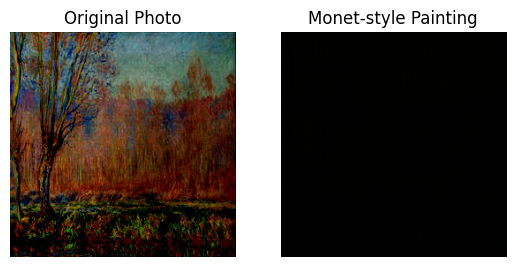

In [21]:
#Visualing the transformation made by the CycleGAN’s monet_generator, converting a photo into a Monet-esque painting.
#Since our generators are not trained yet, the generated Monet-esque photo does not show what is expected at this point.
for data in Monet_ds.take(1):
    image = data[0]  # Access the image if it's the first element of the tuple
    print(image.shape)  # This will print (128, 256, 256, 3)

    # If you want to work with a single image, select one from the batch
    single_image = image[0]  # Now, single_image will have the shape (256, 256, 3)

    # Expand dimensions to add batch size
    single_image_batch = np.expand_dims(single_image, axis=0)  # Shape will be (1, 256, 256, 3)

    # Now you can use this single_image_batch with the generator
    to_monet = monet_generator(single_image_batch)

    # Visualization
    plt.subplot(1, 2, 1)
    plt.title("Original Photo")
    plt.imshow(single_image)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Monet-style Painting")
    plt.imshow(to_monet[0])  # Remove the batch dimension for visualization
    plt.axis("off")

    plt.show()

#This visualization step is useful to check the quality of the transformation and to see how well the CycleGAN model has learned Monet’s style!

## CycleGAN model 

In [22]:
#The CycleGan class inherits from keras.Model, which allows it to integrate seamlessly with TensorFlow’s training framework.
class CycleGan(keras.Model):
    #This is the initializer method for the class, where you set up your CycleGAN model components:
    def __init__(self, monet_generator, photo_generator, monet_discriminator, photo_discriminator, lambda_cycle=10):
        super(CycleGan, self).__init__()
        self.m_gen = monet_generator #monet_generator: The model that converts photos to Monet-style images.
        self.p_gen = photo_generator #photo_generator: The model that converts Monet-style images back to photos.
        self.m_disc = monet_discriminator #monet_discriminator: The model that distinguishes between real Monet images and generated ones.
        self.p_disc = photo_discriminator #photo_discriminator: The model that distinguishes between real photos and generated Monet images.
        
        self.lambda_cycle = lambda_cycle #lambda_cycle: A weight for the cycle consistency loss, 
                                         #which helps ensure that an image can be transformed back to its original form.
        
    #The compile method is where you set the optimizers and loss functions for your model. This prepares your CycleGAN for training.
    #Parameters:
        #Optimizers for each generator and discriminator.
        #Loss functions for the generators and discriminators, including cycle and identity loss functions.    
    def compile(self, m_gen_optimizer, p_gen_optimizer, m_disc_optimizer, p_disc_optimizer, gen_loss_fn, disc_loss_fn, cycle_loss_fn, identity_loss_fn):
        super(CycleGan, self).compile()
        self.m_gen_optimizer = m_gen_optimizer         # Optimizer for the Monet generator
        self.p_gen_optimizer = p_gen_optimizer         # Optimizer for the photo generator
        self.m_disc_optimizer = m_disc_optimizer       # Optimizer for the Monet discriminator
        self.p_disc_optimizer = p_disc_optimizer       # Optimizer for the photo discriminator
        self.gen_loss_fn = gen_loss_fn                 # Loss function for the generators
        self.disc_loss_fn = disc_loss_fn               # Loss function for the discriminators
        self.cycle_loss_fn = cycle_loss_fn             # Cycle consistency loss function
        self.identity_loss_fn = identity_loss_fn       # Identity loss function
        
    #This method defines a single training iteration for the CycleGAN. It computes the necessary losses and updates the model parameters using backpropagation.            
    def train_step(self, batch_data):
        real_monet, real_photo = batch_data  # Unpack the batch data (real Monet images and real photos)
        
        with tf.GradientTape(persistent=True) as tape:
            
            # photo -> monet -> photo
            fake_monet = self.m_gen(real_photo, training=True)   #Generate Monet-style image from a photo
            cycled_photo = self.p_gen(fake_monet, training=True) #Convert the generated Monet-style image back to a photo 

            # monet -> photo -> monet
            fake_photo = self.p_gen(real_monet, training=True)   #Generate photo from a Monet-style image
            cycled_monet = self.m_gen(fake_photo, training=True) #Convert the generated photo back to a Monet-style image

            #Identity loss
                #Generating itself. Ideally the image should remain unchanged if the generator has learned, 
                #to map Monet paintings to Monet-like images without altering them and same thing for the real photos
            same_monet = self.m_gen(real_monet, training=True)   #Generate Monet-style image from a real Monet image (nothing should be added here)
            same_photo = self.p_gen(real_photo, training=True)   #Generate photo from a real photo


            
            #Discriminator used to check, inputing real images
            #"disc_real_monet" represents the discriminator's prediction for real Monet paintings.
            disc_real_monet = self.m_disc(real_monet, training=True) # Discriminator evaluates real Monet images
            disc_real_photo = self.p_disc(real_photo, training=True) # Discriminator evaluates real photos 

            #Discriminator used to check, inputing fake images
            #"disc_fake_monet" represents the discriminator's prediction for fake Monet paintings generated by the Monet generator.
            disc_fake_monet = self.m_disc(fake_monet, training=True) # Discriminator evaluates generated Monet images (fake images)
            disc_fake_photo = self.p_disc(fake_photo, training=True) # Discriminator evaluates generated photos (fake images)


            
            #Loss calculations
            #Evaluates generator loss
            #This is the adversarial loss, which measures how well the generator can fool the corresponding discriminator
            monet_gen_loss = self.gen_loss_fn(disc_fake_monet) # Loss for the Monet generator
            photo_gen_loss = self.gen_loss_fn(disc_fake_photo) # Loss for the photo generator

            #Evaluates total cycle consistency loss 
            #Cycle consistency: check loss after "monet -> photo -> monet" &  "photo -> monet -> photo"
            #This loss ensures that if we transform an image from one domain to another and then back again, we get back the original image.
            total_cycle_loss = self.cycle_loss_fn(real_monet, cycled_monet, self.lambda_cycle) + self.cycle_loss_fn(real_photo, cycled_photo, self.lambda_cycle)


            
            #Evaluates total generator loss
            #"self.identity_loss_fn" penalizes the generators if they unnecessarily alter images that are already in the target style. 
            #"self.lambda_cycle" acts as a weighting factor for the identity loss, ensuring it has a balanced influence on the total generator loss.
            # Now "total_monet_gen_loss" is the combined loss for Monet generator. 
            # It includes the **adversarial loss**, **cycle consistency loss**, & **identity loss**.
            total_monet_gen_loss = monet_gen_loss + total_cycle_loss + self.identity_loss_fn(real_monet, same_monet, self.lambda_cycle)
            total_photo_gen_loss = photo_gen_loss + total_cycle_loss + self.identity_loss_fn(real_photo, same_photo, self.lambda_cycle)

            #Evaluates discriminator loss
            #The disc_loss_fn function calculates how well the Monet discriminator can distinguish between real Monet images and generated
            monet_disc_loss = self.disc_loss_fn(disc_real_monet, disc_fake_monet)
            photo_disc_loss = self.disc_loss_fn(disc_real_photo, disc_fake_photo)



        
        # Calculate the gradients for generator and discriminator
        #"tape.gradient()" function calculates the gradients of total_monet_gen_loss with respect to each parameter in self.m_gen.trainable_variables, 
        #This tells us how much each parameter needs to change to minimize the loss.
        #self.m_gen.trainable_variables lists all variables (parameters) in the Monet generator model that need to be adjusted to minimize this loss.
        monet_generator_gradients = tape.gradient(total_monet_gen_loss, self.m_gen.trainable_variables)
        photo_generator_gradients = tape.gradient(total_photo_gen_loss, self.p_gen.trainable_variables)

        monet_discriminator_gradients = tape.gradient(monet_disc_loss, self.m_disc.trainable_variables)
        photo_discriminator_gradients = tape.gradient(photo_disc_loss, self.p_disc.trainable_variables)

        # Apply the gradients to the optimizer
        #self.m_gen_optimizer is the optimizer for the Monet generator.
        #zip(monet_generator_gradients, self.m_gen.trainable_variables) pairs each calculated gradient with the corresponding parameter in the generator.
        #apply_gradients then updates each parameter based on the gradient, moving the generator closer to minimizing the loss.
        self.m_gen_optimizer.apply_gradients(zip(monet_generator_gradients, self.m_gen.trainable_variables))

        self.p_gen_optimizer.apply_gradients(zip(photo_generator_gradients, self.p_gen.trainable_variables))

        self.m_disc_optimizer.apply_gradients(zip(monet_discriminator_gradients, self.m_disc.trainable_variables))

        self.p_disc_optimizer.apply_gradients(zip(photo_discriminator_gradients, self.p_disc.trainable_variables))
        
        return {
            "monet_gen_loss": total_monet_gen_loss,
            "photo_gen_loss": total_photo_gen_loss,
            "monet_disc_loss": monet_disc_loss,
            "photo_disc_loss": photo_disc_loss
        }

In [23]:
with strategy.scope():
    def discriminator_loss(real, generated):
        real_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(tf.ones_like(real), real)

        generated_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(tf.zeros_like(generated), generated)

        total_disc_loss = real_loss + generated_loss

        return total_disc_loss * 0.5

In [24]:
with strategy.scope():
    def generator_loss(generated):
        return tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(tf.ones_like(generated), generated)

In [25]:
with strategy.scope():
    def calc_cycle_loss(real_image, cycled_image, LAMBDA):
        loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))

        return LAMBDA * loss1

In [26]:
with strategy.scope():
    def identity_loss(real_image, same_image, LAMBDA):
        loss = tf.reduce_mean(tf.abs(real_image - same_image))
        return LAMBDA * 0.5 * loss

In [27]:
with strategy.scope():
    monet_generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
    photo_generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

    monet_discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
    photo_discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [28]:
with strategy.scope():
    cycle_gan_model = CycleGan(
        monet_generator, photo_generator, monet_discriminator, photo_discriminator
    )

    cycle_gan_model.compile(
        m_gen_optimizer = monet_generator_optimizer,
        p_gen_optimizer = photo_generator_optimizer,
        m_disc_optimizer = monet_discriminator_optimizer,
        p_disc_optimizer = photo_discriminator_optimizer,
        gen_loss_fn = generator_loss,
        disc_loss_fn = discriminator_loss,
        cycle_loss_fn = calc_cycle_loss,
        identity_loss_fn = identity_loss
    )

In [29]:
cycle_gan_model.fit(
    tf.data.Dataset.zip((Monet_ds, Photo_ds)),
    epochs=20
)

Epoch 1/20
300/300 [==============================] - 346s 1s/step - monet_gen_loss: 5.1316 - photo_gen_loss: 5.2898 - monet_disc_loss: 0.6456 - photo_disc_loss: 0.6203
Epoch 2/20
300/300 [==============================] - 303s 1s/step - monet_gen_loss: 3.6436 - photo_gen_loss: 3.7269 - monet_disc_loss: 0.6568 - photo_disc_loss: 0.6436
Epoch 3/20
300/300 [==============================] - 296s 986ms/step - monet_gen_loss: 3.6115 - photo_gen_loss: 3.7233 - monet_disc_loss: 0.6380 - photo_disc_loss: 0.6089
Epoch 4/20
300/300 [==============================] - 298s 994ms/step - monet_gen_loss: 3.5154 - photo_gen_loss: 3.6248 - monet_disc_loss: 0.6260 - photo_disc_loss: 0.6105
Epoch 5/20
300/300 [==============================] - 292s 974ms/step - monet_gen_loss: 3.3687 - photo_gen_loss: 3.4716 - monet_disc_loss: 0.6216 - photo_disc_loss: 0.5901
Epoch 6/20
300/300 [==============================] - 294s 979ms/step - monet_gen_loss: 3.3226 - photo_gen_loss: 3.4929 - monet_disc_loss: 0.6213 

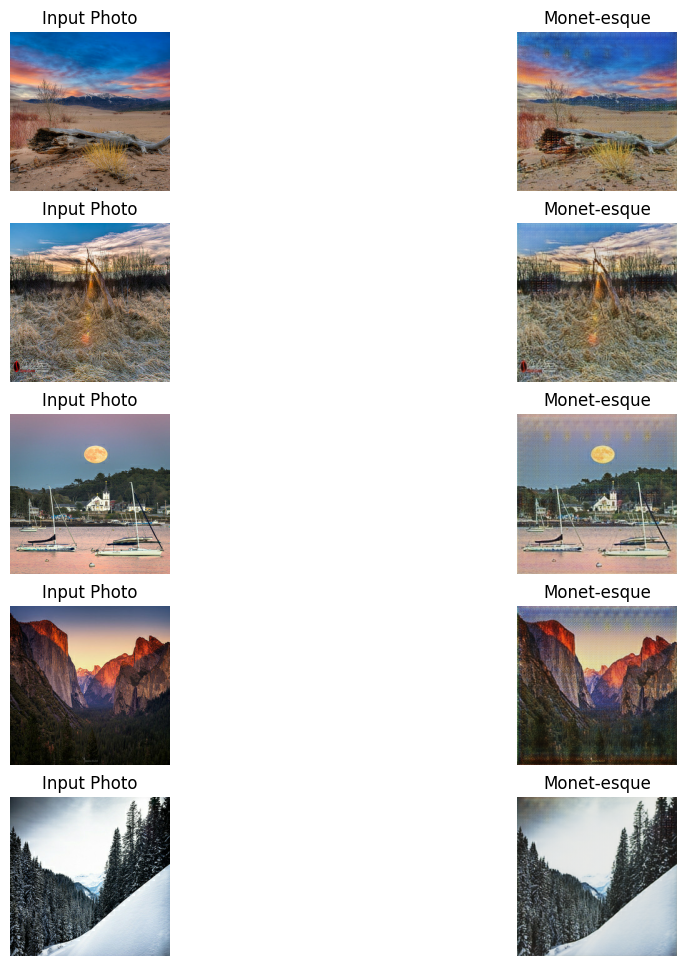

In [36]:
_, ax = plt.subplots(5, 2, figsize=(12, 12))
for i, img in enumerate(Photo_ds.take(5)):
    prediction = monet_generator(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    img = np.squeeze(img)  # This changes shape from (1, 256, 256, 3) to (256, 256, 3)
    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input Photo")
    ax[i, 1].set_title("Monet-esque")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")

plt.show()

In [35]:
i = 1
for img in Photo_ds:
    prediction = monet_generator(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    im = PIL.Image.fromarray(prediction)
    im.save( + str(i) + ".jpg")
    i += 1

NameError: name 'PIL' is not defined